In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_Linear_fit_period_This_work.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined_Boyd.out
2022_Feb_week4_new_ephemeris_LTT_fit.jpg
2022_Feb_week4_new_ephemeris_LTT_fit_Beuermann_2011.jpg
DP_Leo_LTT_fit.ipynb
DP_Leo_LTT_fit_Beuermann_2011.ipynb
DP_Leo_LTT_fit_Beuermann_2011_Res.jpg
DP_Leo_LTT_fit_Boyd.ipynb
DP_Leo_LTT_fit_Boyd_Res.jpg
DP_Leo_LTT_fit_Demo.ipynb
DP_Leo_LTT_fit_Demo.jpg
DP_Leo_LTT_fit_Demo1.ipynb
DP_Leo_LTT_fit_Demo1.jpg
DP_Leo_LTT_fit_Demo1_Res.jpg
DP_Leo_LTT_fit_Demo_Res.jpg
DP_Leo_LTT_fit_Res.jpg
DP_Leo_LTT_fit_weighted_data.ipynb
DP_Leo_LTT_fit_weighted_data.jpg
DP_Leo_LTT_fit_weighted_data_Beuermann_2011.ipynb
DP_Leo_LTT_fit_weighted_data_Beuermann_2011_Res.jpg
DP_Leo_LTT_fit

In [3]:
DP_Leo = open("2022_Feb_week4_Linear_fit_period_This_work.dat",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Linear_fit_period_This_work.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#New ephemeris
T0_bjd = 2448773.2148464173
T0_bjd_err = 2.9564294265740673e-09
P0_day = 0.062362845525219396
P0_day_err = 2.6193240365559364e-19

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
#    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err


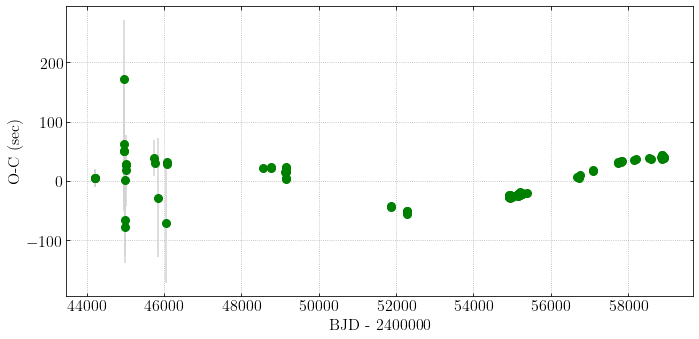

In [7]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_OC_diagram.out'
Data   = np.genfromtxt(Input)

N_BMJD = 2400000
BJD_time = Data[:,0] - N_BMJD
Cycle = Data[:,1]
T_O_linear = Data[:,2]
T_C_linear = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N_BMJD))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [8]:
#Read data ---#1
Input = "2022_Feb_week4_OC_diagram.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0] - N_BMJD
Epoch = Data[:,1]
OC = Data[:,4]
OC_err = Data[:,5]

In [9]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
print(len_x)
#print(x)

114


In [10]:
def LTT_fit(x,K,e,b,w):
    return K*(1 - e*e)*np.sin((b*x) - w)/(1 + e*np.cos(b*x))

In [11]:
import scipy.optimize as optimization  
#guess = (K,e,b,w)
guess = [33.7, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [22]:
K = params[0]
e = params[1]
b = params[2]
w = params[3]

dK = params_covariance[0,0]
de = params_covariance[1,1]
db = params_covariance[2,2]
dw = params_covariance[3,3]

ocfit = LTT_fit(x,K,e,b,w)


print("The Keplerian parameters:")
print("K =", K, "+/-", dK**0.5, "[m/s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

The Keplerian parameters:
K = 47.96125336110731 +/- 0.5731804355226414 [m/s]
e = -0.1512828985601084 +/- 0.01383154840252732 [days]
b = 0.0004909804255834693 +/- 1.8947813041839002e-06 [rad]
w = -3.809157005999956 +/- 0.11084754172852593 [rad]
w_deg = -218.2486199464863 +/- 6.351096310444814 [deg]


In [13]:
# Calculate the period and tau
P_d = 2*np.pi/b
tau = 2*np.pi/b

print(P_d)

12797.22159944116


In [14]:
x_min, x_max = np.amin(BJD_time), np.amax(BJD_time)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x)
print(x_line)
#print(y)
print(y_line)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[44214.55325    44514.8914498  44815.22964959 45115.56784939
 45415.90604918 45716.24424898 46016.58244878 46316.92064857
 46617.25884837 46917.59704816 47217.93524796 47518.27344775
 47818.61164755 48118.94984735 48419.28804714 48719.62624694
 49019.96444673 49320.30264653 49620.64084633 49920.97904612
 50221.31724592 50521.65544571 50821.99364551 51122.33184531
 51422.6700451  51723.0082449  52023.34644469 52323.68464449
 52624.02284429 52924.36104408 53224.69924388 53525.03744367
 53825.37564347 54125.71384327 54426.05204306 54726.39024286
 55026.72844265 55327.06664245 55627.40484224 55927.74304204
 56228.08124184 56528.41944163 56828.75764143 57129.09584122
 57429.43404102 57729.77224082 58030.11044061 58330.44864041
 58630.7868402  58931.12504   ]
[ 1.53635284e+01  2.06855058e+01  2.55897947e+01  3.00131552e+01
  3.38945072e+01  3.71741306e+01  3.97932586e+01  4.16941491e+01
  4.28207255e+01  4.31198914e+01  4.25436183e+01  4.10518913e+01
  3.86165496e+01  3.52259762e+01  3.08904

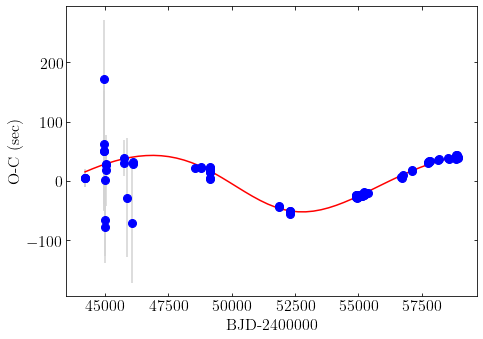

In [15]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(7, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line, '-r')

plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.show()

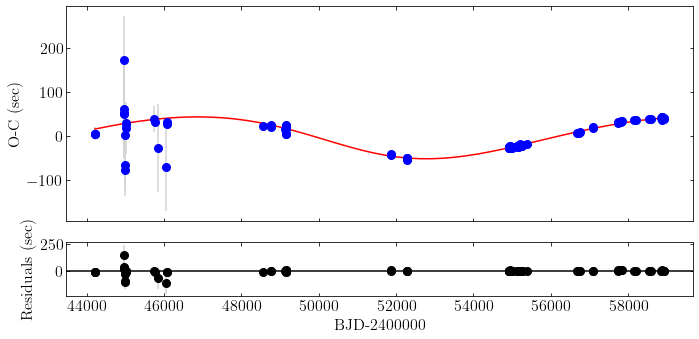

In [16]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red')

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Residual = y-ocfit

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [17]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = LTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [18]:
InputFile_out = "interporate.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

#print(y_range)

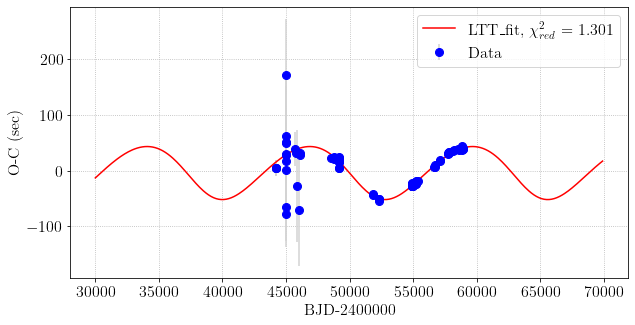

In [19]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Demo1.jpg", dpi=1000)
plt.show()

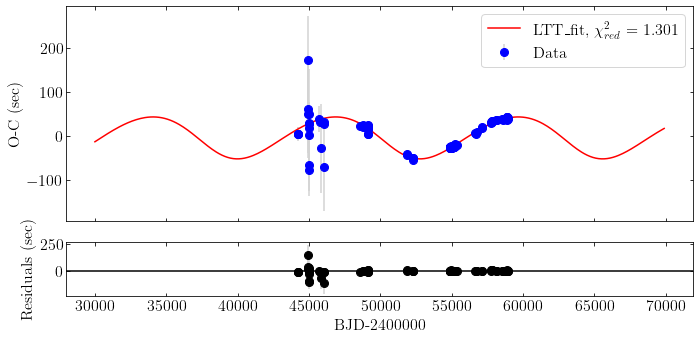

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range, y_range, '-', color='red',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_Demo1_Res.jpg", dpi=1000)

plt.show()